# Analyzing the downloaded data

## Assumptions

You have used the `download_stenos.py` and `generate_pandas.py` to download the steno protocols and save them into a compressed pickle.

I have them under ./data/ folder, you will have to adjust the paths accordingly to your storage location.

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

df1993 = pd.read_csv('./data/psp1993_1996.tsv.xz', sep='\t', header=0, encoding='utf-8', compression='xz')
df1996 = pd.read_csv('./data/psp1996_1998.tsv.xz', sep='\t', header=0, encoding='utf-8', compression='xz')
df1998 = pd.read_csv('./data/psp1998_2002.tsv.xz', sep='\t', header=0, encoding='utf-8', compression='xz')
df2002 = pd.read_csv('./data/psp2002_2006.tsv.xz', sep='\t', header=0, encoding='utf-8', compression='xz')
df2006 = pd.read_csv('./data/psp2006_2010.tsv.xz', sep='\t', header=0, encoding='utf-8', compression='xz')
df2010 = pd.read_csv('./data/psp2010_2013.tsv.xz', sep='\t', header=0, encoding='utf-8', compression='xz')
df2017 = pd.read_csv('./data/psp2017.tsv.xz', sep='\t', header=0, encoding='utf-8', compression='xz')
df2013 = pd.read_csv('./data/psp2013_2017.tsv.xz', sep='\t', header=0, encoding='utf-8', compression='xz')

print("Pandas version: {}".format(pd.__version__))

df2017.columns

Pandas version: 1.0.5


Index(['session', 'date', 'topic_idx', 'topic_str', 'order', 'name',
       'steno_name', 'file_name', 'tokens', 'birthyear', 'age', 'sex',
       'titles', 'party', 'text'],
      dtype='object')

The data frame contains interventions in each two and the following columns:
   
   - 'session', 'date', 'topic_idx', 'topic_str', 'order', 
     The session, the date of the session, the topic being discussed, and the order of intervention for the session
   
   - 'name','steno_name', 
     The name of the speacker and the string that appears in the steno protocol
   
       - 'age', 'sex', 'titles','party', 'birthday'
       Information about the speaker; `age is the age at the time of the last steno of the dataset`
   
   - 'file_name', 'text', 
     The file name that contains the information, and the text in the filed
   
   - 'tokens', 
     The number of tokens on the unfiltered file


We have loaded all the stenos and metadata from the sessions between 1993 and 2020.

Let's do a sanity check and veorify that there are no dupplicates in the text field (i.e. same content downloaded in two differnt files)

In [4]:

dfs = [(df1993,'df1993'), (df1996,'df1996'), (df1998,'df1998'),
       (df2002,'df2002'), (df2006,'df2006'), (df2010,'df2010'),
       (df2013,'df2013'), (df2017,'df2017') ]

for df, df_name in dfs:
    dup_count = df.duplicated(["session", "topic_idx", "text"]).sum()
    if dup_count > 0:
        print(f"WARNING: found {dup_count} dupplicates in data set df2010")
        print("          Correcting...")
        df = df.drop_duplicates(["session", "topic_idx", "text"], keep='first')
        print(f"  {dup_count} dupplicates in data set {df_name} after correction")
    else:
        print(f"No dupplicates in data set {df_name}")


          Correcting...
  6 dupplicates in data set df1993 after correction
No dupplicates in data set df1996
          Correcting...


  12 dupplicates in data set df1998 after correction
No dupplicates in data set df2002


          Correcting...
  1 dupplicates in data set df2006 after correction
No dupplicates in data set df2010


No dupplicates in data set df2013
No dupplicates in data set df2017


In [11]:
total_files = 0
total_tokens = 0
for df, df_name in dfs:
    print(f"{df_name}")
    print(f"\tTotal files:  {df['tokens'].count()}")
    print(f"\tTotal tokens: {df['tokens'].sum()}")
    total_files += df['tokens'].count()
    total_tokens += df['tokens'].sum()

print(f"Total number of files in {len(dfs)} datasets = {total_files}")
print(f"Total number of files in {len(dfs)} datasets = {total_tokens}")



df1993
	Total files:  11249
	Total tokens: 2537473
df1996
	Total files:  11612
	Total tokens: 2545109
df1998
	Total files:  24685
	Total tokens: 4210373
df2002
	Total files:  25697
	Total tokens: 4528242
df2006
	Total files:  19377
	Total tokens: 3696899
df2010
	Total files:  16468
	Total tokens: 3256285
df2013
	Total files:  28939
	Total tokens: 5620010
df2017
	Total files:  15139
	Total tokens: 3057989
Total number of files in 8 datasets = 153166
Total number of files in 8 datasets = 29452380


We can see who are the people that have more tokens, for that we will group the data frame by `name` and sum the tokens. Finally we can take the 10 largest.

In [22]:
top_n = 10

for df, df_name in dfs:
    g_name = df.groupby(["name","party"])
    print(f"\n{df_name}:")
    print(f"\tTotal number of different speakers: {len(g_name)}")
    print(f"\tTop {top_n} speakers by number of tokens for {df_name}\n")
    print(g_name[["party","tokens"]].sum().nlargest(top_n, "tokens"))


df1993:
	Total number of different speakers: 225
	Top 10 speakers by number of tokens for df1993

                          tokens
name             party          
Ivan Kočárník    ODS       85700
Jozef Wagner     ČSSD      83429
Milan Uhde       ODS       64409
Zdeněk Vorlíček  KSČM      47964
Miloslav Výborný KDU-ČSL   44838
Jan Ruml         ODS       43601
Jiří Vlach       ODS       38129
Jiří Vyvadil     ČSSD      38071
Jiří Novák       ODS       37056
Gerta Mazalová   HSD-SMS   36897

df1996:
	Total number of different speakers: 226
	Top 10 speakers by number of tokens for df1996

                           tokens
name              party          
Zdeněk Jičínský   ČSSD      73436
Václav Klaus      ODS       68518
Vojtěch Filip     KSČM      63783
Miroslav Sládek   SPR-RSČ   60726
Josef Krejsa      SPR-RSČ   55629
Jozef Wagner      NOPARTY   54388
Ivan Pilip        ODS       50824
Miloš Zeman       ČSSD      48941
Zdeněk Krampera   SPR-RSČ   44652
Miloslav Ransdorf KSČM      4416

                            tokens
name               party          
Zbyněk Stanjura    ODS      387564
Bohuslav Sobotka   ČSSD     267594
Miroslav Kalousek  TOP09    187703
Petr Bendl         ODS      134829
František Laudát   TOP09    112293
Andrej Babiš       ANO2011  111385
Martin Kolovratník ANO2011  105232
Vojtěch Filip      KSČM     103694
Ludvík Hovorka     KDU-ČSL   97121
Michal Kučera      TOP09     83998

df2017:
	Total number of different speakers: 263
	Top 10 speakers by number of tokens for df2017

                            tokens
name               party          
Zbyněk Stanjura    ODS      139704
Andrej Babiš       ANO2011   91046
Alena Schillerová  ANO2011   82463
Martin Kolovratník ANO2011   79072
Jakub Michálek     Piráti    74209
Tomio Okamura      SPD       68445
Miroslav Kalousek  TOP09     62115
Adam Vojtěch       ANO2011   61914
Vojtěch Munzar     ODS       56799
Mikuláš Ferjenčík  Piráti    54037


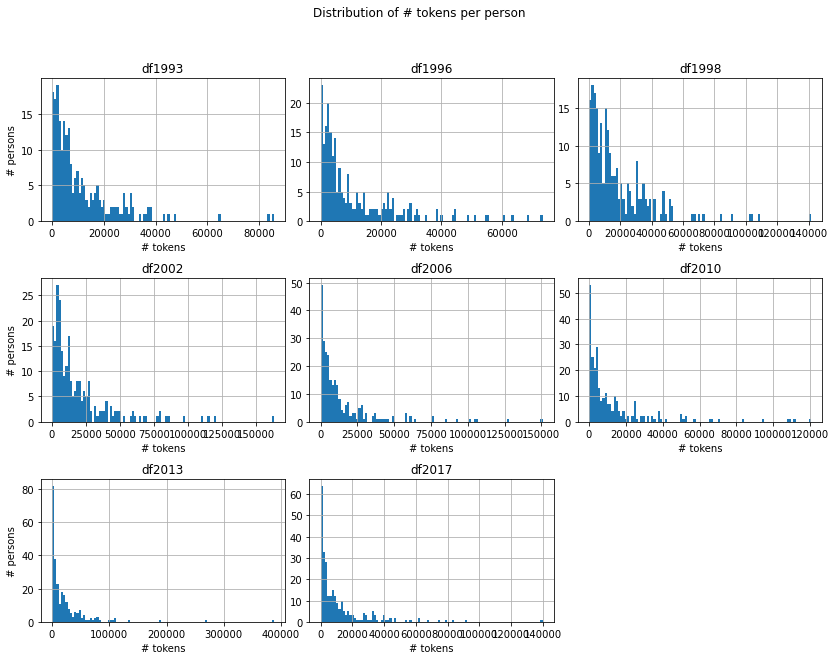

In [52]:
matplotlib.rcParams['figure.figsize'] = [14, 10]

cols = 3
rows = len(dfs)//3
if len(dfs)%3: 
    rows += 1

plt.suptitle("Distribution of # tokens per person")
idx = 1
for df, df_name in dfs:
    

    ax1=plt.subplot(rows, cols, idx)
    df.groupby(["name"])["tokens"].sum().hist(bins=100, ax=ax1)
    plt.title(f"{df_name}")
    if idx%3 == 1:
        plt.ylabel("# persons")
    plt.xlabel('# tokens')
    idx += 1

plt.subplots_adjust(hspace=0.4, wspace=0.1)


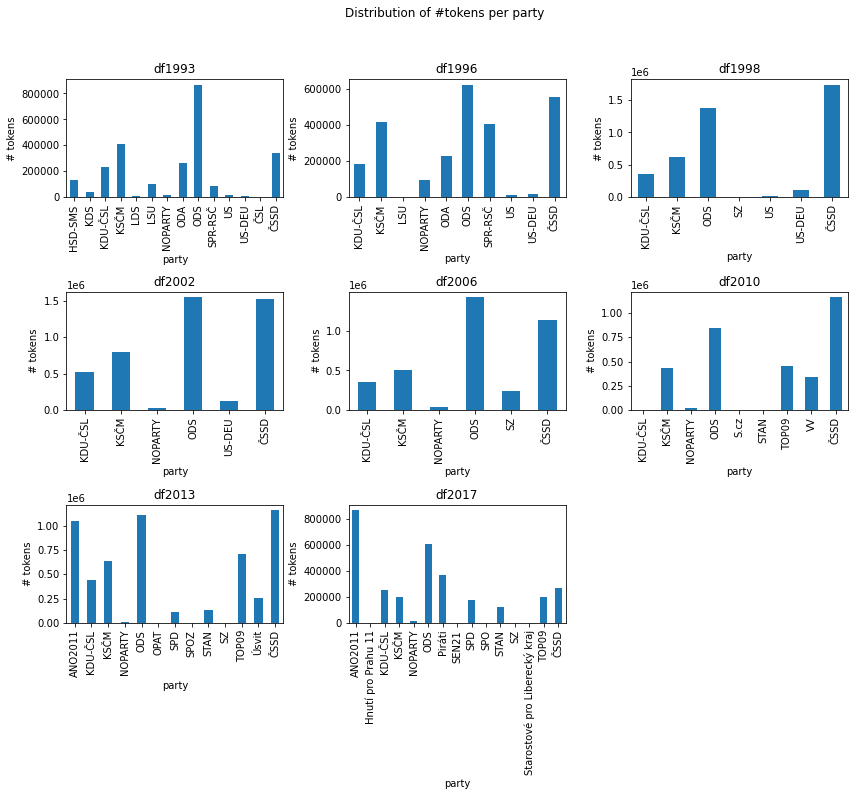

In [48]:

matplotlib.rcParams['figure.figsize'] = [14, 10]
cols = 3
rows = len(dfs)//3
if len(dfs)%3: 
    rows += 1
plt.suptitle('Distribution of #tokens per party')

idx = 1
for df, df_name in dfs:
    

    ax1=plt.subplot(rows, cols, idx)
    kk=df.groupby(["party"])["tokens"].sum().plot.bar(ax=ax1)
    plt.ylabel("# tokens")
    _ = plt.title(f"{df_name}")
    idx += 1
plt.subplots_adjust(hspace=0.8, wspace=0.3)


For our analysis model we need relatively long speaches, we will consider only speeches longer than 1000 tokens.

Now let's count how many interventions have more than 1000 tokens

In [29]:
limit = 1000

for df, df_name in dfs:
    longdf = df[df["tokens"] > limit]["text"].count()
    longdf_tokens = df[df["tokens"] > limit]["tokens"].sum()
    print(f"{df_name}:")
    print(f"Long interventions (more than {limit} tokens) in {df_name}: {longdf} - total tokens {longdf_tokens} ")


df1993:
Long interventions (more than 1000 tokens) in df1993: 365 - total tokens 539651 
df1996:
Long interventions (more than 1000 tokens) in df1996: 357 - total tokens 543886 
df1998:
Long interventions (more than 1000 tokens) in df1998: 58 - total tokens 62479 
df2002:
Long interventions (more than 1000 tokens) in df2002: 98 - total tokens 106944 
df2006:
Long interventions (more than 1000 tokens) in df2006: 101 - total tokens 112006 
df2010:
Long interventions (more than 1000 tokens) in df2010: 113 - total tokens 124244 
df2013:
Long interventions (more than 1000 tokens) in df2013: 171 - total tokens 192204 
df2017:
Long interventions (more than 1000 tokens) in df2017: 102 - total tokens 115672 


If we consider only speeches of 1000 tokens we don't end up with a lot of data, let's agregate per speaker per session and topic and check the number of tokens we obtain considering only those speakers that have an aggregated number of tokens per session over 1000

In [30]:
limit = 1000

limit = 1000

for df, df_name in dfs:
    longdf = df[df["tokens"] > limit]["text"].count()
    longdf_tokens = df[df["tokens"] > limit]["tokens"].sum()

    grp = df.groupby(by=["name", "session", "topic_idx"])
    longdf = grp["tokens"].sum()[ grp["tokens"].sum() > limit ].count()
    longdf_tokens = grp["tokens"].sum()[ grp["tokens"].sum() > limit].sum()

    print(f"{df_name}:")
    print(f"Long interventions (more than {limit} tokens) in {df_name}: {longdf} - total tokens {longdf_tokens} ")



df1993:
Long interventions (more than 1000 tokens) in df1993: 536 - total tokens 859407 
df1996:
Long interventions (more than 1000 tokens) in df1996: 541 - total tokens 930231 
df1998:
Long interventions (more than 1000 tokens) in df1998: 442 - total tokens 603886 
df2002:
Long interventions (more than 1000 tokens) in df2002: 522 - total tokens 775714 
df2006:
Long interventions (more than 1000 tokens) in df2006: 621 - total tokens 1001205 
df2010:
Long interventions (more than 1000 tokens) in df2010: 507 - total tokens 806673 
df2013:
Long interventions (more than 1000 tokens) in df2013: 923 - total tokens 1564650 
df2017:
Long interventions (more than 1000 tokens) in df2017: 587 - total tokens 949478 


Text(0.5, 1.0, 'Tokens per speech in 2017-')

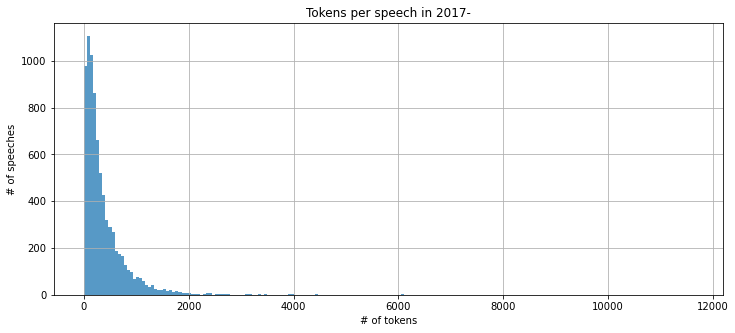

In [31]:
# Create a groupby object and then build a data frame with sum of tokens and appended strings, group by more fields if required
g2017 = df2017.groupby(['session', 'topic_idx', 'name'])
df2017agg = pd.merge(g2017['tokens'].sum(), g2017['text'].sum(), left_index=True, right_index=True).reset_index()
_ = plt.hist(df2017agg['tokens'], bins=200, alpha=0.75)
plt.grid()
plt.ylabel("# of speeches")
plt.xlabel('# of tokens')
plt.title('Tokens per speech in 2017-')

In [32]:
df2017agg[df2017agg['tokens']>limit]

,session,topic_idx,name,tokens,text
39,1,7,Pavel Bělobrádek,1315,"Vážený pane předsedající, kolegyně, kolegové, ..."
47,1,7,Zbyněk Stanjura,1007,"Hezké dopoledne, pane předsedající, členové vl..."
50,1,9,Andrej Babiš,1124,"Takže dobrý den, vážený pane předsedající. Kol..."
63,1,9,Miroslav Kalousek,1861,"Děkuji za slovo, pane předsedo. Vážené paní po..."
68,1,9,Radek Vondráček,2041,"Tak uvidíme, jestli zůstanu poslední. Vážené k..."
...,...,...,...,...,...
7953,39,292,Richard Brabec,1749,Děkuji za ten dotaz. Já vám teď neřeknu nějaké...
7956,39,292,Vladimír Kremlík,3329,"Vážený pane předsedající, vážený pane poslanče..."
7961,39,292,Věra Kovářová,1599,"Vážený pane premiére, minulý týden jsem zaznam..."
7975,39,295,Ivan Bartoš,2351,"Dobrý den, dámy a pánové. Pane předsedající, d..."
